### 공공데이터포털
- https://www.data.go.kr/tcs/dss/selectDataSetList.do?keyword=%EC%86%8C%EC%83%81%EA%B3%B5%EC%9D%B8&brm=&svcType=&instt=&recmSe=N&conditionType=init&extsn=&kwrdArray=


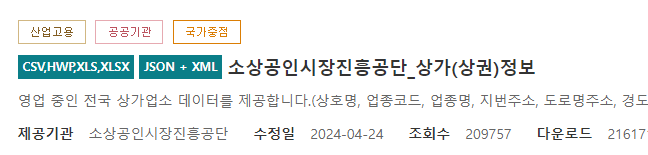

In [1]:
!pip install koreanize_matplotlib

# 나눔 글꼴
!apt -qq -y install fonts-nanum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 18.9 MB/s eta 0:00:00
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
import koreanize_matplotlib

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

### 1. 데이터 로드

In [ ]:
df_store = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/data/소상공인시장진흥공단_상가(상권)정보_서울_202403.csv', encoding="cp949")

In [ ]:
# 전체 행,열

df_store.shape

In [ ]:
# 앞 5 개

df_store.head()

In [ ]:
# 뒤 5개

df_store.tail()

In [ ]:
# index 정보

df_store.index

In [ ]:
# 컬럼 정보

df_store.columns

In [ ]:
# 정보(info)

df_store.info()

In [ ]:
# 결측치 확인

n = df_store.isnull().sum()

In [ ]:
n.plot.bar(figsize=(12,5));

In [ ]:
n.sort_values().plot.barh(figsize=(12,10));

### 2. 데이터 전처리
- 1) 결측치가 많은 컬럼 제거
- 2) 표준산업분류명, 표준산업분류코드 컬럼 제거

In [ ]:
# 제거할 컬럼명 추출

not_use = n.sort_values(ascending=False).head(9)
not_use_col = not_use.index
not_use_col

In [ ]:
# axis=0 : index (기본값)
# axis = 1 : columns
# inplace=False (기본값) : 데이터프레임에 직접 반영 여부

# df_store.drop(columns=not_use_col)
df_store.drop(not_use_col, axis=1, inplace=True)

In [ ]:
df_store.shape

In [ ]:
# 컬럼명에 ~~코드, ~~번호 가 들어있는 컬럼 제거

# 전체 컬럼명 추출
cols = df_store.columns

# 전체 컬럼명에서 제거할 컬럼명 추출
drop_cols = cols[cols.str.contains('코드|번호')]

In [ ]:
df_store.drop(drop_cols, axis=1, inplace=True)

In [ ]:
df_store.info()

### 3. 데이터 분석
- 데이터 조회
  - 열(컬럼)/행(인덱스)
    - 행 기준 : .loc[행], .loc[행, 열] → 레이블 기준
    - 행 기준 : .iloc[행], .iloc[행, 열] → 인덱스 기준

In [ ]:
# series

# df_store['상호명']
df_store[['상호명','도로명주소']]

In [ ]:
df_store.loc[0]

In [ ]:
# [[]] : 행, 열 개념으로 뽑기 (데이터프레임 형태)

df_store.loc[[0]]

In [ ]:
df_store.loc[[0,1,2]]

In [ ]:
df_store.loc[0,'상호명']

In [ ]:
df_store.loc[0:2,'상호명']

In [ ]:
df_store.loc[0:2,['상호명','도로명주소']]

In [ ]:
# 5 를 포함하지 않음
# ValueError : i 는 이름 X 순서로 지정해야함
df_store.iloc[0:5, 0]

In [ ]:
# 5 를 포함함

df_store.loc[0:5]

In [ ]:
# 기술통계요약

df_store.describe()

In [ ]:
df_store[['경도','위도']].describe()

In [ ]:
df_store[['경도','위도']].max()

In [ ]:
df_store[['경도','위도']].mean()

In [ ]:
# 중앙값 출력

df_store[['경도','위도']].quantile()

In [ ]:
df_store[['경도','위도']].quantile(q=0.25)

In [ ]:
print("평균값 : {}".format(df_store['경도'].mean()))
print("중앙값 : {}".format(df_store['경도'].median()))

In [ ]:
df_store['경도'].var()

- 단변량 수치형 변수 시각화 : displot 활용

In [ ]:
sns.displot(df_store['위도'], kde=True);

In [ ]:
sns.displot(df_store['경도'], kde=True);

### 상관분석
- -1 ~ 1 사이의 값을 가짐
-  -1 : 반대방향으로 동일
- 0 : 관계없음
- 1 : 완전동일

In [ ]:
corr = df_store.corr(numeric_only=True)
corr

In [ ]:
sns.heatmap(corr, annot=True, cmap="Blues")

In [ ]:
x = np.arange(6).reshape((2,3))
x

# x 의 배열 형태와 똑같은 numpy 배열 생성(1 을 담아서)
np.ones_like(x)

In [ ]:
# mask = np.triu(np.ones_like(corr, dtype=bool))
mask = np.tril(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap="Blues", mask=mask)

In [ ]:
# 경도, 위도 시각화

sns.scatterplot(data=df_store.sample(1000), x='경도', y='위도');

In [ ]:
sns.regplot(data=df_store.sample(1000), x='경도', y='위도');

In [ ]:
sns.lmplot(data=df_store.sample(1000), x='경도', y='위도');

In [ ]:
sns.lmplot(data=df_store.sample(1000), x='경도', y='위도', hue="시도명", truncate=False, fit_reg=True);

In [ ]:
sns.lmplot(data=df_store.sample(1000), x='경도', y='위도', hue="시도명", truncate=False, fit_reg=True, col="시군구명");

In [ ]:
# 빈도수 구하기

df_store['상권업종대분류명'].value_counts()

In [ ]:
# 서브셋 추출
# df_store['상권업종대분류명'] == "음식"

# df_food = df_store[df_store['상권업종대분류명'] == "음식"].copy()
# df_food = df_food[df_food['시군구명'] == '강남구'].copy()

df_food = df_store[(df_store['상권업종대분류명'] == "음식") & (df_store['시군구명'] == '강남구')]
df_food['상권업종중분류명'].value_counts()

In [ ]:
df_store_seoul = df_store[(df_store['상권업종대분류명'] == "음식") & (df_store['시도명'] == '서울특별시')]
df_store_seoul

In [ ]:
# df_store_seoul 시군구명, 상권업종중분류명 그룹지정 후 상호명 개수 세기

food_gu = df_store_seoul.groupby(['시군구명', '상권업종중분류명'])['상호명'].count()
food_gu.unstack()

In [ ]:
food_gu.plot.bar();

In [ ]:
food_gu.unstack().plot.bar(figsize=(15,6));

In [ ]:
food_gu.unstack().loc['강남구'].plot.bar(figsize=(15,6));

In [ ]:
df_food = food_gu.reset_index().rename(columns={"상호명":"상호수"})

In [ ]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_food, x='시군구명', y='상호수', errorbar=None);

In [ ]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_food, x='상권업종중분류명', y='상호수', errorbar=None);

In [ ]:
sns.catplot(data=df_food, x='상권업종중분류명', y='상호수', kind='bar', col='시군구명', col_wrap=2)

In [ ]:
df_store.loc[(df_store['상권업종대분류명'] == '교육') & (df_store['시도명'] =='서울특별시')]

In [ ]:
# df_store['상권업종대분류명'].value_counts()

df_academy = df_store.loc[(df_store['상권업종대분류명'] == '교육') & (df_store['시도명'] =='서울특별시')]
df_academy.head(3)

In [ ]:
df_academy['상호명'].value_counts()

In [ ]:
# 학원 수가 많은 순으로 구 정렬
df_academy['시군구명'].value_counts()

In [ ]:
df_academy_cnt = df_academy['상권업종소분류명'].value_counts()

In [ ]:
# 소분류명의 개수가 1000 이상인 데이터 추출

df_academy_cnt_1000 = df_academy_cnt[df_academy_cnt > 1000]
df_academy_cnt_1000

In [ ]:
# 시군구명,상권업종소분류명 그룹화, 상호명 count
academy_group = df_academy.groupby(['시군구명','상권업종소분류명'])['상호명'].count()
academy_group

In [ ]:
# 강북구

academy_group.loc['강남구']

In [ ]:
df_academy = academy_group.reset_index().rename(columns={'상호명':'상호수'})

In [ ]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_academy, x='시군구명', y='상호수', errorbar=None);

In [ ]:
df_academy = df_store.loc[(df_store['상권업종대분류명'] == '교육') & (df_store['시도명'] =='서울특별시')]
df_academy_cnt_1000 = df_academy_cnt[df_academy_cnt > 1000]

In [ ]:
# 상권업종소분류명을 빈도수 1000개 이상
df_academy_cnt_1000.index

In [ ]:
# df_academy['상권업종소분류명'].value_counts()

# df_academy[df_academy['상권업종소분류명'].isin(df_academy_cnt_1000.index)]

df_academy_selected = df_academy.loc[df_academy['상권업종소분류명'].isin(df_academy_cnt_1000.index)].copy()
df_academy_selected

In [ ]:
df_academy_selected['시군구명'].value_counts()

In [ ]:
# 대치동 학원
df_academy_selected[df_academy_selected['법정동명'] =='대치동']

In [ ]:
# 상권업종소분류명 빈도수 계산

# df_academy_selected[df_academy_selected['법정동명'] =='대치동']['상권업종소분류명'].value_counts()
df_academy_selected.loc[df_academy_selected['법정동명'] =='대치동', '상권업종소분류명'].value_counts()

In [ ]:
df_academy_selected.loc[df_academy_selected['법정동명'] =='목동', '상권업종소분류명'].value_counts()

In [ ]:
# df_academy_selected
# '상권업종소분류명','시군구명' 그룹화 count

academy_ = df_academy_selected.groupby(['상권업종소분류명','시군구명'])['상호명'].count()

In [ ]:
# 입시·교과학원 시각화

academy_.loc['입시·교과학원'].sort_values().plot.barh(figsize=(10,7))

In [ ]:
academy_.unstack().iloc[:5, :5]

In [ ]:
# T or transpose() : 행열바꿈

academy_.unstack().T

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_academy_selected, x='경도', y='위도', hue='시군구명')

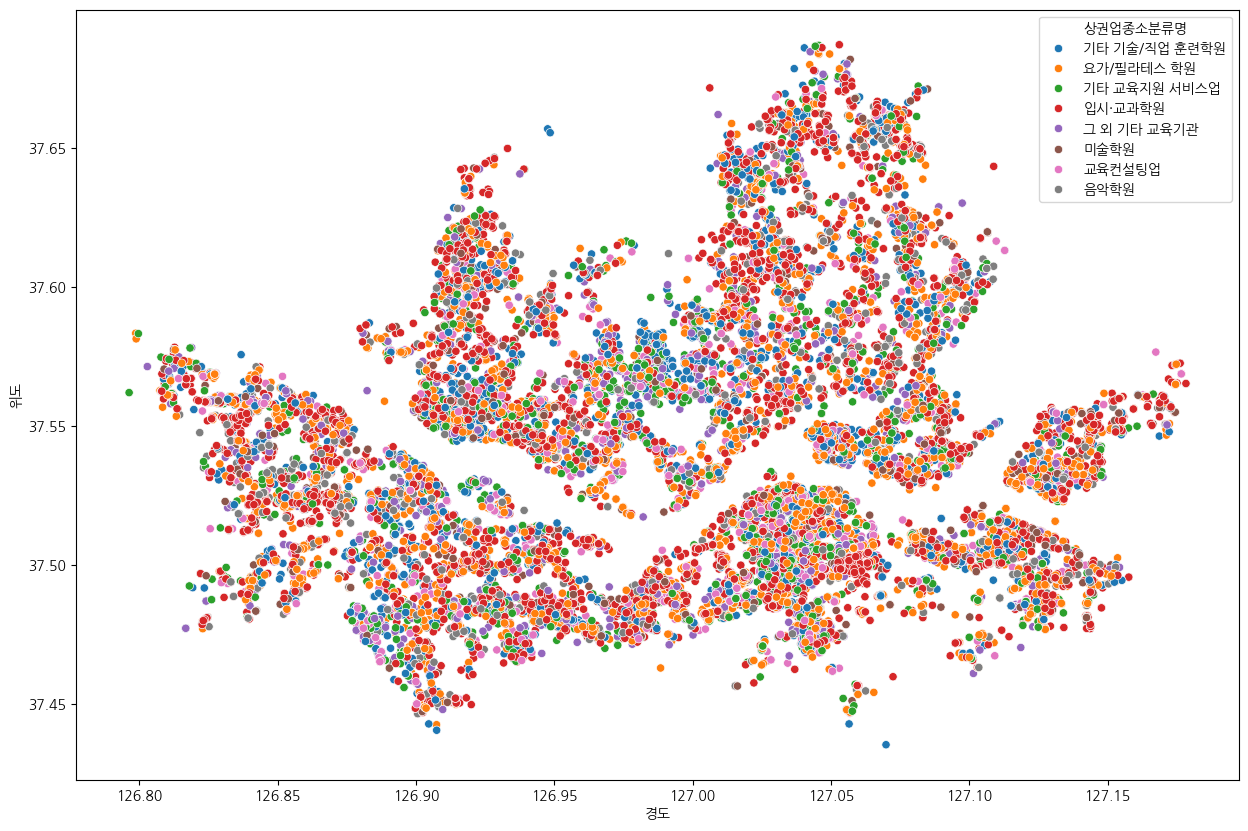

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_academy_selected, x='경도', y='위도', hue='상권업종소분류명');

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_academy_selected[df_academy_selected['상권업종소분류명'] == '입시·교과학원'],
                x='경도', y='위도', hue='상권업종소분류명');

In [ ]:
# 음악학원, 미술학원 포함해서 시각화

plt.figure(figsize=(15,10))
sns.scatterplot(data=df_academy_selected[df_academy_selected['상권업종소분류명'].isin(['입시·교과학원','음악학원','미술학원'])],
                x='경도', y='위도', hue='상권업종소분류명');

In [ ]:
import folium

In [ ]:
import json

geo_path ='/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/data/seoul_municipalities_geo_simple.json'

# 우리나라 위경도 데이터 로드
geo_str = json.load(open(geo_path, encoding="utf-8"))
geo_str

In [ ]:
long = df_academy_selected['경도'].mean()
lat = df_academy_selected['위도'].mean()

m = folium.Map(location=(lat, long), zoom_start=11)
m

In [ ]:
df_s = df_academy_selected[df_academy_selected['상권업종소분류명'] == '입시·교과학원']
df_s.shape

In [ ]:
df_s = df_s.sample(1000)
df_s.shape

In [ ]:
df_s.iloc[0]

In [ ]:
m = folium.Map(location=(lat, long), zoom_start=11)

folium.Marker([37.602638,127.031416], tooltip="생각하는황소성북학원").add_to(m)
m

In [ ]:
df_s.index

In [ ]:
df_s.loc[186029,'상호명']

In [ ]:
m = folium.Map(location=(lat, long), zoom_start=11)

for idx in df_s.index[:200]:
  lat = df_s.loc[idx,'위도']
  long = df_s.loc[idx,'경도']
  tooltip = df_s.loc[idx,'상호명'] + " " + df_s.loc[idx,'도로명주소']
  folium.Marker([lat,long], tooltip=tooltip).add_to(m)
m

In [ ]:
m.save("/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/data/academy.html")